In [1]:
# For interactive plots, comment the next line
%pylab inline
# For interactive plots, uncomment the next line
# %pylab ipympl
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# Introduction

This notebook demonstrates how to access a repository of terrain data stored on S3. 

Specifically, this example will demonstrate:

* Retrieving a subset of data over arbitrary coordinates
* Plotting retrieved data with state boundaries overlaid using the `cartopy` library
* How to retrieve a single file as stored on S3

# Terrain Tiles

A global dataset providing bare-earth terrain heights, tiled for easy usage and provided on S3.

Source: https://registry.opendata.aws/terrain-tiles/

- Description
    - Gridded elevation tiles
- Resource type
    - S3 Bucket
- Amazon Resource Name (ARN)
    - `arn:aws:s3:::elevation-tiles-prod`
- AWS Region
    - `us-east-1`

## TerrainTiles

Select multiple terrain tiles based on arbitrary podpac Coordinates

In [2]:
from podpac.datalib.terraintiles import TerrainTiles
from podpac import Coordinates, clinspace

INFO:botocore.credentials:Found credentials in shared credentials file: ~/.aws/credentials


In [3]:
# create terrain tiles node
node = TerrainTiles(tile_format='geotiff', zoom=8)

# create coordinates to get tiles
c = Coordinates([clinspace(43, 40, 1000), clinspace(-76, -72, 1000)], dims=['lat', 'lon'])

# evaluate node
output = node.eval(c)

INFO:podpac.datalib.terraintiles:Downloading S3 fileobj (Bucket: elevation-tiles-prod, Key: geotiff/8/73/94.tif)
INFO:botocore.vendored.requests.packages.urllib3.connectionpool:Starting new HTTPS connection (1): elevation-tiles-prod.s3.amazonaws.com
INFO:podpac.datalib.terraintiles:Downloading S3 fileobj (Bucket: elevation-tiles-prod, Key: geotiff/8/74/94.tif)
INFO:podpac.datalib.terraintiles:Downloading S3 fileobj (Bucket: elevation-tiles-prod, Key: geotiff/8/75/94.tif)
INFO:podpac.datalib.terraintiles:Downloading S3 fileobj (Bucket: elevation-tiles-prod, Key: geotiff/8/76/94.tif)
INFO:podpac.datalib.terraintiles:Downloading S3 fileobj (Bucket: elevation-tiles-prod, Key: geotiff/8/73/95.tif)
INFO:podpac.datalib.terraintiles:Downloading S3 fileobj (Bucket: elevation-tiles-prod, Key: geotiff/8/74/95.tif)
INFO:podpac.datalib.terraintiles:Downloading S3 fileobj (Bucket: elevation-tiles-prod, Key: geotiff/8/75/95.tif)
INFO:podpac.datalib.terraintiles:Downloading S3 fileobj (Bucket: elevati

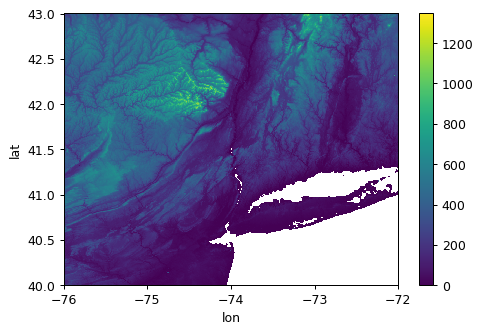

In [4]:
# plot the elevation
fig = plt.figure(dpi=90)
output.plot()
pass

# Plotting results with `cartopy`

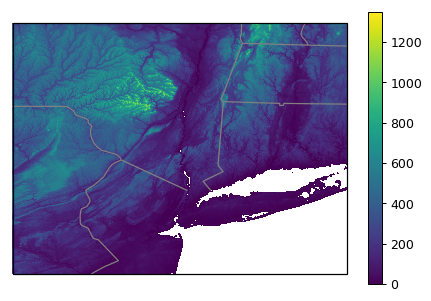

In [5]:
# plot with state boundaries data
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# create the figure
fig = plt.figure(dpi=90)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# set bounds using output
lat_bounds = [output['lat'].min(), output['lat'].max()]
lon_bounds = [output['lon'].min(), output['lon'].max()]
ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

# ax.add_feature(rivers, edgecolor='red', linewidth=2)
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax.add_feature(states_provinces, edgecolor='gray')

output.plot()
pass

# Download source files locally

In [6]:
# download active source files locally
# you must evaluate the node at coordinates for sources to be defined
node.download()

## Retrieving a single file using `TerrainTilesSource`

Load one individual tile from the TerrainTiles set

In [7]:
from podpac.datalib.terraintiles import TerrainTilesSource

In [8]:
# select a single source from S3 bucket url  
# see `terraintiles.get_tile_urls(...)` below for getting tile endpoints
node = TerrainTilesSource(source='geotiff/6/19/23.tif')

# evaluate at its native coordinates
output = node.eval(node.native_coordinates)

INFO:podpac.datalib.terraintiles:Downloading S3 fileobj (Bucket: elevation-tiles-prod, Key: geotiff/6/19/23.tif)


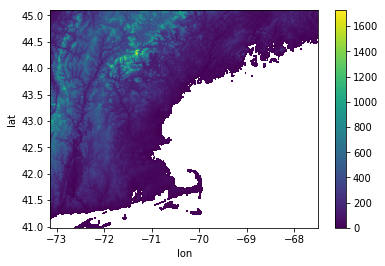

In [9]:
# plot the gridded output data
output.plot()

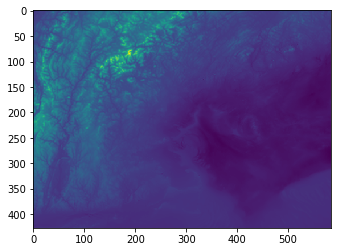

In [10]:
# plot the original raster image using the
# `node` reference to the rasterio dataset
plt.imshow(node.dataset.read(1))
pass

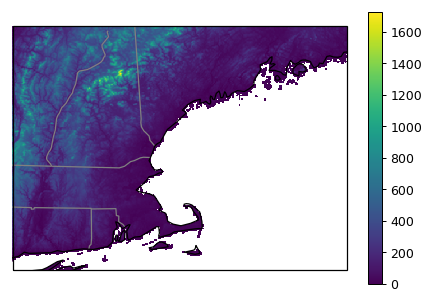

In [11]:
# plot with state lines using Cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# create the figure
fig = plt.figure(dpi=90)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# set bounds using node's native coordinates
lat_bounds = [output['lat'].min(), output['lat'].max()]
lon_bounds = [output['lon'].min(), output['lon'].max()]
ax.set_extent([lon_bounds[0], lon_bounds[1], lat_bounds[0], lat_bounds[1]], crs=ccrs.PlateCarree())

# Cartopy Feature interface
# See https://scitools.org.uk/cartopy/docs/latest/gallery/feature_creation.html
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')
ax.coastlines(resolution='50m', linewidth=1)

output.plot()
pass

In [12]:
# download active source files locally
# you must evaluate the node at coordinates for sources to be defined
node.download()

## Utilities

In [13]:
from podpac.datalib import terraintiles
from podpac.coordinates import Coordinates, clinspace

In [14]:
# available tile formats
terraintiles.TILE_FORMATS

['terrarium', 'normal', 'geotiff']

In [15]:
# get zoom levels tile format
terraintiles.get_zoom_levels(tile_format='geotiff')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [16]:
# get all tile urls for tile format ('geotiff') certain zoom level (1)
terraintiles.get_tile_urls('geotiff', 1)

['geotiff/1/0/0.tif',
 'geotiff/1/1/0.tif',
 'geotiff/1/2/0.tif',
 'geotiff/1/0/1.tif',
 'geotiff/1/1/1.tif',
 'geotiff/1/2/1.tif',
 'geotiff/1/0/2.tif',
 'geotiff/1/1/2.tif',
 'geotiff/1/2/2.tif']

In [17]:
# create coordinates for region
c = Coordinates([clinspace(43, 40, 1000), clinspace(-73, -72, 1000)], dims=['lat', 'lon'])

# get all tile urls for tile format ('geotiff') certain zoom level (9) within coordinates
terraintiles.get_tile_urls('geotiff', 9, coordinates=c)

['geotiff/9/152/188.tif',
 'geotiff/9/153/188.tif',
 'geotiff/9/152/189.tif',
 'geotiff/9/153/189.tif',
 'geotiff/9/152/190.tif',
 'geotiff/9/153/190.tif',
 'geotiff/9/152/191.tif',
 'geotiff/9/153/191.tif',
 'geotiff/9/152/192.tif',
 'geotiff/9/153/192.tif',
 'geotiff/9/152/193.tif',
 'geotiff/9/153/193.tif']